# Optimizing the paramaters of the classification models

In [1]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [42]:
# loading the excel file
dataset = pd.read_excel (r'/Users/shreyasanjayshirodkar/Downloads/MACCSbinary.xlsx', sheet_name='MACCSbinary')
# droping the test set with NA labels
df_train =dataset.dropna()
X = df_train.iloc[:, 3:152]
Y = df_train.iloc[:, 0]

In [43]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [44]:
# Standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Optimizing knn classifier with k values

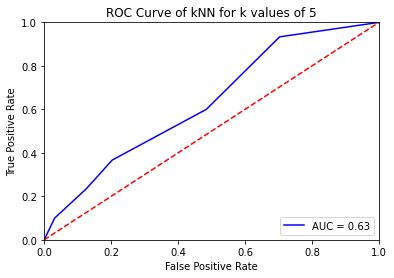

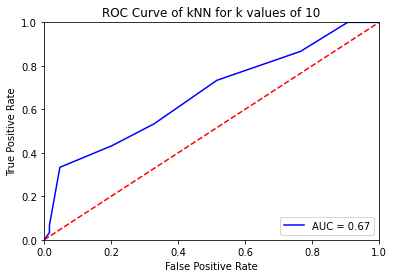

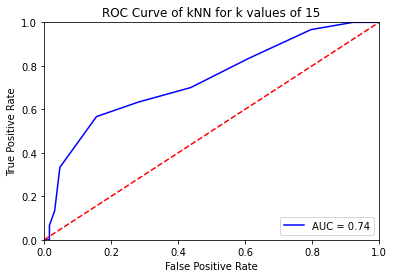

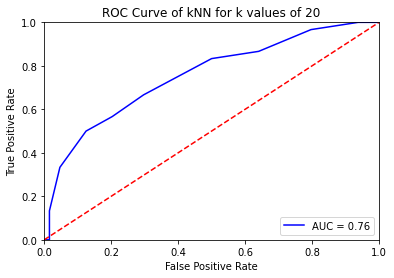

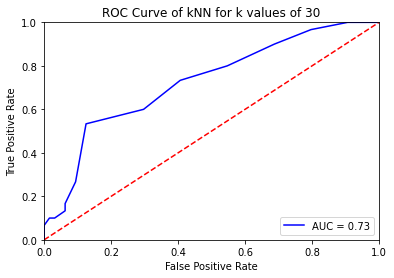

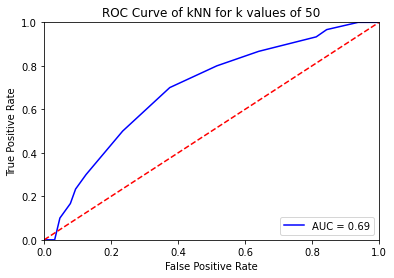

In [45]:
# knn with different k values
k = [5, 10 , 15, 20, 30, 50]

for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_test1 = y_test.values
    y_pred_probs = classifier.predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_probs[:,1], pos_label = "Sensitive")
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN for k values of ' + str(i) )
    plt.show()

Setting the nearest neighbours to 20 gives the best fit of AUC = 0.76 for the knn classifier 

### Optimization of Logistic Regression classifier 

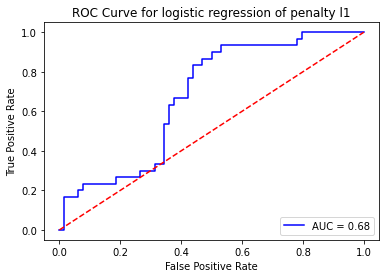

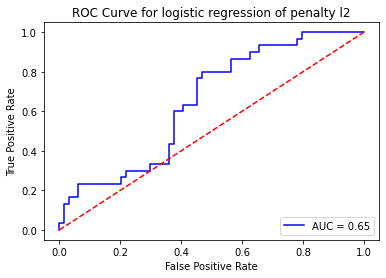

In [46]:
# logistic regression
from sklearn.linear_model import LogisticRegression
pen = ["l1","l2"]

for i in pen:
    classifier_log = LogisticRegression(solver = "liblinear",random_state = 0, penalty = i)
    classifier_log.fit(X_train, y_train)
    y_pred_log = classifier_log.predict(X_test)
    y_test1_pred = y_test.values
    y_probs_log = classifier_log.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test1_pred, y_probs_log [:,1], pos_label = "Sensitive")
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic for logistic regression')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve for logistic regression of penalty ' + i)
    plt.show()
    

Setting the solver as liblinear and the penalty of l1 gives the best fit of AUC = 0.68 for the logistic regression classifier

### Optimization of Gradient Boosting classifier 

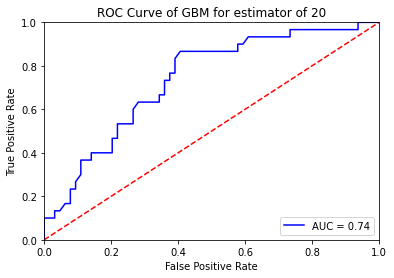

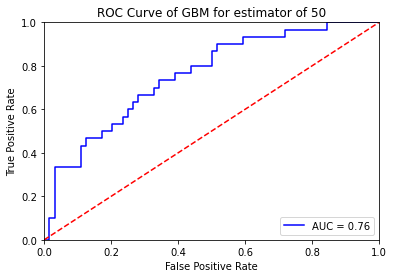

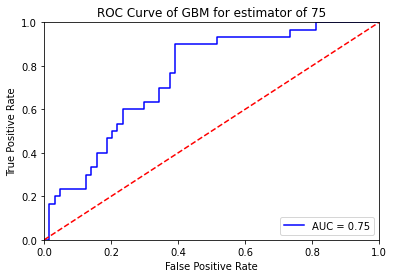

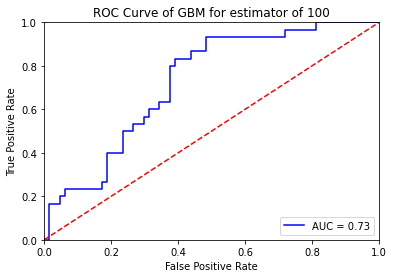

In [47]:

# knn with different k values
estimates = [20,50, 75, 100]
#depth = [1,2,3,4,5]

for i in estimates:
    #for j in depth:
        classifier_GBM = GradientBoostingClassifier(n_estimators = i, learning_rate=1.0, max_depth= 1, random_state=0).fit(X_train, y_train)
        classifier_GBM.score(X_test, y_test)
        y_pred = classifier_GBM.predict(X_test)
        y_test_GBM = y_test.values
    #y_pred_probs
        y_GBM_probs = classifier_GBM.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test_GBM, y_GBM_probs[:,1], pos_label = "Sensitive")
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC Curve of GBM for estimator of ' + str(i))
        plt.show()

Setting the estimator at 50 and max depth to 1 gives the best fit of AUC = 0.76 for the GBM classifier

### Optimization of SVM classifier

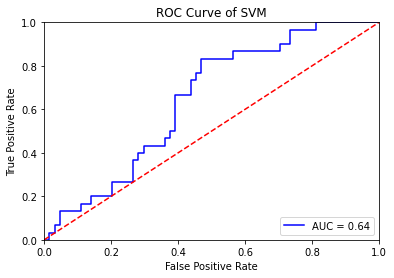

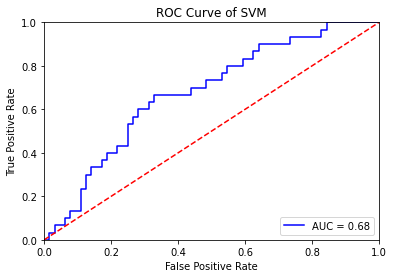

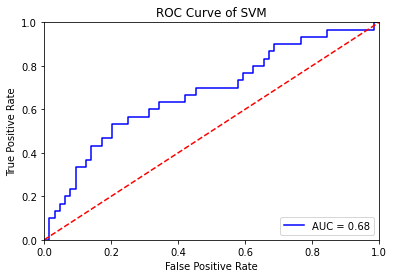

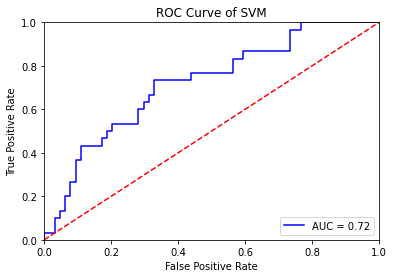

In [48]:
# SVM model

kernal = ["linear", "poly", "rbf", "sigmoid"]

for i in kernal:
    classifier_svm = SVC(kernel = i, random_state = 0, probability=True)
    classifier_svm.fit(X_train, y_train)
    classifier_svm.score(X_test, y_test)
    y_pred = classifier_svm.predict(X_test)
    y_test_SVM = y_test.values
#y_pred_probs
    y_SVM_probs = classifier_svm.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_SVM, y_SVM_probs[:,1], pos_label = "Sensitive")
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of SVM')
    plt.show()


Setting the kernal ro sigmoid gives the best fit of AUC = 0.72 for the GBM classifier

### Optimization of Naive Bayes classifier

In [49]:
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

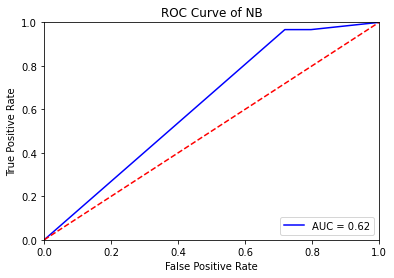

In [50]:
y_test_nb = y_test.values
#y_pred_probs
y_nb_probs = classifier_NB.predict_proba(X_test)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_nb, y_nb_probs[:,1], pos_label = "Sensitive")
roc_auc = auc(fpr_nb, tpr_nb)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NB')
plt.show()

### Optimization of Decision Tree Classifier

In [51]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)

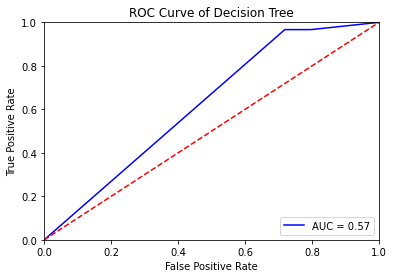

In [52]:
y_test_dt = y_test.values
#y_pred_probs
y_dt_probs = classifier_dt.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_dt_probs[:,1], pos_label = "Sensitive")
roc_auc = auc(fpr_dt, tpr_dt)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()